In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
path = "kala_azar.csv"
path = "filariasis.csv"
df  = pd.read_csv(path)

In [61]:
df.columns

Index(['Disease', 'Disease.keyword', 'ExtractedDate', 'ExtractedDateTime',
       'Incident', 'Incident.keyword', 'Incident_Type',
       'Incident_Type.keyword', 'Incident_type', 'Incident_type.keyword',
       'Language', 'Language.keyword', 'Location', 'Location.keyword',
       'MLPipelineVersion', 'MLPipelineVersion.keyword', 'Number',
       'OriginalArticle', 'OriginalArticle.keyword', 'Score', 'Source',
       'Source.keyword', 'Start', 'TranslatedArticle',
       'TranslatedArticle.keyword', 'Url', 'Url.keyword', '_id', '_index',
       '_score', '_type'],
      dtype='object')

In [67]:
df.shape

(160, 4)

In [63]:
#df['ExtractedDateTime'] = pd.to_datetime(df['ExtractedDateTime'])

df['ExtractedDateTime']

0       Mar 5, 2023 @ 08:39:22.000
1      Feb 25, 2023 @ 09:17:13.000
2      Feb 23, 2023 @ 13:35:04.000
3      Feb 15, 2023 @ 16:35:12.000
4      Feb 14, 2023 @ 14:35:04.000
                  ...             
97      Jun 8, 2022 @ 19:27:29.000
98      Jun 1, 2022 @ 17:52:06.000
99      Jun 1, 2022 @ 17:52:06.000
100    May 27, 2022 @ 15:36:02.000
101    Apr 26, 2022 @ 05:26:36.000
Name: ExtractedDateTime, Length: 102, dtype: object

10
[0. 1. 2. 3. 4. 5.]
[0. 1. 2. 3. 4. 5.]
[[10.        ]
 [10.50000001]
 [12.00000001]
 [14.50000001]
 [18.00000001]
 [22.50000001]]


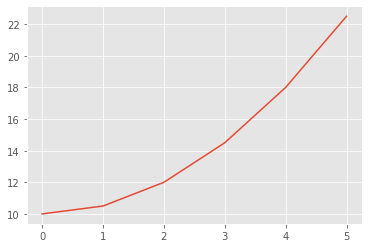

In [91]:
# ordinary differential equations
def derivative(y,x):
    dydx = x
    return dydx

print(ode(5,10))

y0 = 10
x = np.linspace(0,5,6)
print(x)

print(derivative(5,x))
y = odeint(derivative, y0,x)
print(y)

plt.plot(x,y)
plt.show()

In [64]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [65]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

R0 is 3.0


<AxesSubplot:xlabel='day'>

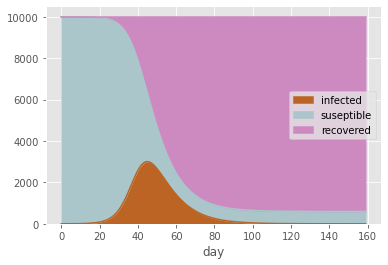

In [94]:
effective_contact_rate = 1/3
recovery_rate = 1/9

# We'll compute this for fun
print("R0 is", effective_contact_rate / recovery_rate)

# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 10000
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered

# A list of days, 0-160
days = range(0, 160)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=True)

# If you get the error:
#
#     When stacked is True, each column must be either all
#     positive or negative.infected contains both...
#
# just change stacked=True to stacked=False